# BEE313 Problem 1.1

## Objective 
A 10 km2 catchment located within the foothills of the Cascades has an average annual rainfall of 1750 mm/year and an average annual stream flow of 0.3 m3/sec. Based on data from meteorological stations located within the basin, it is estimated that the average ET is 4 mm/day. Given the location of this catchment, it is hypothesized that it may have strong groundwater inputs or outputs. Based on these flows, what is the groundwater contribution to this basin in each year in mm/year (with positive being out of the basin)?

Equation for Q:
Q = Q_discharge/A

Equation for mass balance:

P - ET - Q +/-GW = deltaS

GWout - GWin  = P - ET - Q - deltaS 

GW  = P - ET - Q - deltaS 
Assumption:

deltaS = 0

## Methods:
1. 



In [20]:
# Import statements
import numpy as np

# function to solve for GW
def GW (P,Q,ET,dS):
    GW = P-ET-Q-dS
    return GW
# known parameters
rain_mm_yr = 1750 #mm/year
annual_strm_flow = .3 #m3/sec
avg_ET = 4 #mm/day
deltaS = 0 #no change
area =10*1000*1000*1000*1000 #mm

# solved for Q
Qm_sec = annual_strm_flow/area # m/s

# convert all units to mm per year
## converted the stream flow into mm/year
Q_mm_yr= Qm_sec*60*60*24*365*1000


## converted the ET to mm/year
ET_mm_yr = avg_ET*365

# Applied the new parameters into the function
GW_final = GW(rain_mm_yr, Q_mm_yr,ET_mm_yr,deltaS )

print(f"Groundwater Contribution GW_final {GW_final:.3f}mm/year out of the basin")





Groundwater Contribution GW_final 289.999mm/year out of the basin


## Results:
and here

## Discussion:
The 289.05 mm/year represents that the flux is going primarily out of the system

# BEE313 Problem 1.2

## Objective :
An air parcel from the Pacific Ocean with an average air temperature of 21C and relative humidity of 65% moves onshore at Newport and is lofted over the coast range. The weather station on Marys peak reports that temperature of this air parcel is 8C degrees when it passes by. If the average thickness of this air mass is 2.5km, what is the minimum amount of rainfall (assuming the cloud is not super-saturated) that must have occurred between the coast and Mary's peak?

## Methods:
and here



The min it can be 1 before reaching super saturated...
so RH = 1



In [3]:
# Assumptions:
import numpy as np
# constants
Rv = 461 # J/kg*K
rho_water = 1000 #1000 kg/m^3
h = 2500 #m

# pv for 21C (t1)
e_sat21 = 611*np.exp(17.3*(21)/((21)+237.3))
#print(e_sat21) #Pa
## found vapor pressure
### RH = e/e*
e_21 = .65*e_sat21

#print(e_21

### found 
pv21 =  e_21/(Rv*(21+273.15))
print(pv21)
# pv for 8C (t2)
### important to note that at this point 
e_sat8 = 611*np.exp(17.3*(8)/((8)+237.3))
#print(e_sat8) #Pa
## found vapor pressure
### RH = e/e*
# Where RH = 1
e_8 = 1*e_sat8
#print(e_8)
### found 
pv8 =  e_8/(Rv*(8+273.15))
print(pv8)


## Checked Densities
# print(pv8)
# print(pv21)

# Precipitation
P = (pv21 - pv8)*(h/rho_water)
P_m = P * 1000
print("Precipitation", P_m,"m")

0.011954233731587962
0.008287703860603355
Precipitation 9.166324677461517 m


In [4]:
# Difference between Masses
####


## Results:
and here

## Discussion:
and here

\pagebreak

# BEE313 Problem 1.3

## Objective:
Within a study watershed there are three precipitation gauges with the following average annual rainfall [mm] at the following elevations [m]:

GaugePrecipitation = [715, 750, 895]

GaugeElevations = [460, 600, 1180]

Topographic analysis of this watershed gives the following distribution of its area with elevation: 

AreaFraction = [0.0, 0.028, 0.159, 0.341, 0.271, 0.151, 0.042, 0.008]

AreaElevations = [100, 300, 500, 700, 900, 1100, 1300, 1500]

Where the AreaElevations are the average elevation range associated with each fraction of the catchment. For example, 2.8%, of the basins area has an average elevation of 300m. Given this information, estimate the average annual precipitation that this watershed receives.

## Methods:
1. Plot known precipitation and elevation values
2. Develop an equation for this model
3. Then run a regression to determine the coefficients that are necessary 
4. Then will apply the new model for precipitation to generate estimated precipitation values for the Area Elevations
5. After Generating new precipiation values for these elevations then the weights (area fractions) will be applied to the modelled precipitation values
6. Save these values into a new portion of the Area Directory for later use
7. Take the average of these precipitation values!

Average Annual Precipitation 800.800 mm/year


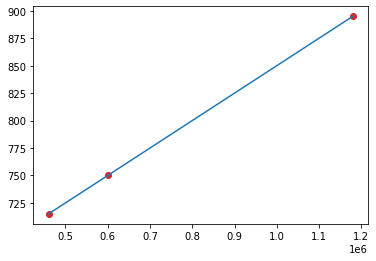

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
# Step 1 inputted data into two separate dictionaries

gauge_dict = {
    "P_gauge":[715,750,895],
    "E_gauge":[460,600,1180] 
}
area_dict = {
    "area_fraction":[0.0,.028,.159,.341,.271,.151,.042,.008],
    "E_area":[100,300,500,700,900,1100,1300,1500]
}
gauge_df = pd.DataFrame(gauge_dict)
area_df = pd.DataFrame(area_dict)
# Step 2: performed a Regression on the Limited Data Available for Precipitation and Gauge Elevation
## Set the figure

## Set the x and y values (observed gauge elevation and observed precipitation and )
### converted to numpy arrays
obs_elv = (gauge_df['E_gauge'].values)*1000
obs_precip =gauge_df['P_gauge'].values

# Initial Plot of Points 
fig1 = plt.figure()
ax3_1 = fig1.add_subplot(111)
ax3_1.plot(obs_elv,obs_precip,color= "tab:blue", label = "observed")
ax3_1.scatter(obs_elv,obs_precip,color= "tab:red", label = "observed")


# Step 3:Created a Function for Modeling the Precipitation
### This was constructed based on the determiningation that the precipirtion follows a linear form
def modelP(elevation, P_const, P_init):
     precip = P_const*elevation + P_init
     return precip



# Step 4: Used Curve Fit to determine the necessary coefficients needed for this model
## Data To Input
elv_area = (area_df['E_area'].values)*1000
### Curvefit(model equation, x observed values, y observed valyes, coefficients in a tuple)
## generated coefficients for model 

popt,pcov = curve_fit(modelP, obs_elv, obs_precip, p0=(5,1))

## then using the new model parameters the estimated non-weighted precipitation was found
est_precip = modelP(elv_area, popt[0], popt[1])

# Step 5: Incorporate Weights to the Precipitation Values
## saved these estimated precipiation values into a new column in the dataframe
area_df['est_p_wght'] = est_precip
est_p_no_wght = area_df['est_p_wght']

## Apply the weight to the precipitation values and change the name of the column in the dataframe

# #### Multiply Area Fraction (Weight) By Precipitation Values
area_df['est_p_wght'] =  est_p_no_wght * area_df["area_fraction"]
est_p_wght = area_df['est_p_wght']
# Step 6: Now will sum the values
Ann_Avg_Precip = np.sum(est_p_wght)

print(f"Average Annual Precipitation {Ann_Avg_Precip:.3f} mm/year")

## Results:
and here

## Discussion:
and here

\pagebreak

# BEE313 Problem 1.4

## Objective:
Annual rainfall totals in Corvallis [mm] from 1901 to 1999 (inclusive) are:

AnnualRainfall = 
[1021.06,1052.48,1330.55,889.06,1407.20,886.63,1163.28,1168.88,897.59,1249.29,
993.65,963.82,1240.87,958.52,1144.11,1017.51,1252.29,1074.10,897.10,1284.55,1097.71,1105.44,1000.74,933.31,966.33,903.02,1033.65,1206.93,988.68,673.89,
654.62,1052.87,998.38,1157.67,981.55,718.48,869.52,1505.57,911.09,775.72,
1118.34,975.42,1132.92,947.14,659.60,1200.15,1033.66,1022.35,1227.38,907.94,
1435.88,1190.44,778.84,1326.98,1162.43,1246.73,1043.58,1034.07,1116.40,934.84,
1126.82,1211.50,932.40,1022.74,1188.63,907.78,1015.64,887.22,1393.42,1067.60,
1224.72,1336.84,1154.76,1238.44,1234.72,1095.73,748.32,1025.56,923.02,1071.70,
1112.84,1200.78,1209.95,1422.25,1245.29,693.02,1112.20,967.55,970.48,766.32,
974.69,849.93,833.45,902.90,954.75,1382.77,1918.39,1162.03,1520.63]

Using the Weibul plotting position, estimate the 10-year annual precipitation total in Corvallis.

## Methods:

10 year return interval...

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99]
99
[  1.01010101   1.01010101   1.01010101 ... 100.         100.
 100.        ]
The 10-day storm has a depth of 1331.0mm using an interpolated CDF


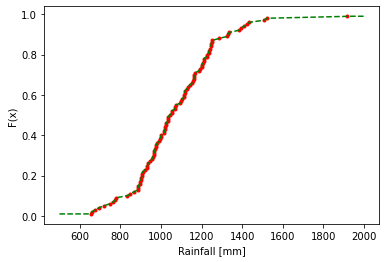

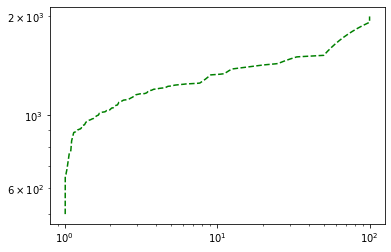

In [19]:
# My Method 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data
Rain_input = [1021.06,1052.48,1330.55,889.06,1407.20,886.63,1163.28,1168.88,897.59,1249.29,
993.65,963.82,1240.87,958.52,1144.11,1017.51,1252.29,1074.10,897.10,1284.55,1097.71,1105.44,1000.74,933.31,966.33,903.02,1033.65,1206.93,988.68,673.89,
654.62,1052.87,998.38,1157.67,981.55,718.48,869.52,1505.57,911.09,775.72,
1118.34,975.42,1132.92,947.14,659.60,1200.15,1033.66,1022.35,1227.38,907.94,
1435.88,1190.44,778.84,1326.98,1162.43,1246.73,1043.58,1034.07,1116.40,934.84,
1126.82,1211.50,932.40,1022.74,1188.63,907.78,1015.64,887.22,1393.42,1067.60,
1224.72,1336.84,1154.76,1238.44,1234.72,1095.73,748.32,1025.56,923.02,1071.70,
1112.84,1200.78,1209.95,1422.25,1245.29,693.02,1112.20,967.55,970.48,766.32,
974.69,849.93,833.45,902.90,954.75,1382.77,1918.39,1162.03,1520.63]

Year_input = np.arange(1901,1999+1,1)
# Created a Dataframe with Years and Associated Data
corvo_rain = {
    "year": Year_input,
    "annual_rain":Rain_input,
}

# Sorted the Data
corvo_df = pd.DataFrame(corvo_rain)

corvo_df_sort = corvo_df.sort_values(by=['annual_rain'], ascending = True)

# Reset the Indicies and then dropped the old index column
corvo_df_sort = corvo_df_sort.reset_index()
corvo_df_sort = corvo_df_sort.drop(columns = ['index'])

# added rank
corvo_df_sort['Rank'] = np.arange(1, len(Year_input)+1)
rank = corvo_df_sort['Rank']
# Estimated the Empirical Distribution of the Rainfall (F(x))

F = np.empty(len(rank))
values = np.arange(len(rank))
for num in values:
    F[num] =(rank[num]/((len(rank))+1))
print(F)
# Called all of the relevant variables
corvo_df_sort["F(x)"] = F
F_x = corvo_df_sort["F(x)"]
print(len(F_x))
year = corvo_df_sort["year"]
rank = corvo_df_sort["Rank"]
annual_rain = corvo_df_sort["annual_rain"]
#print(corvo_df_sort["F(x)"].head(99))
# Utilized Interp CDF
## First needed to get the x coordinates, and for this got the max and min values for precipitation
rainmin, rainmax =annual_rain.min(), annual_rain.max()


## generated x values going from 500 to 2000
Precip_eval = np.arange(500,2000,1)
## used np.interp to return the linear interpolation for further estimation
pptInterpCDF = np.interp(Precip_eval,annual_rain,F_x)

fig4 = plt.figure()
ax4_1 = fig4.add_subplot(111)
# ax4_1.scatter,F_x, color ="tab:red", label = "observed")
ax4_1.plot(annual_rain,F_x,'r.')
ax4_1.plot(Precip_eval,pptInterpCDF,'g--')
ax4_1.set_xlabel('Rainfall [mm]')
ax4_1.set_ylabel('F(x)')


# Solve for the RI using Interp method
pptInterpRI = 1/(1-pptInterpCDF)
print(pptInterpRI)
fig4_2 = plt.figure()
ax4_2 = fig4_2.add_subplot(111)
ax4_2.plot(pptInterpRI,Precip_eval,'g--',label='Empirical (Interp)')
ax4_2.set_yscale('log')
ax4_2.set_xscale('log')

pptYear = 10
print('The %d-day storm has a depth of %.1fmm using an interpolated CDF' % (
    pptYear, Precip_eval[np.argmin((pptInterpRI-pptYear)**2)]))



## Results:
and here

## Discussion:


What was the ten year event


\pagebreak